# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import statsmodels.api as sm
from scipy.optimize import curve_fit


# Data

In [2]:
# STRONG SCALING

strong_scaling_MPI = pd.read_csv('../results/strong_scaling_MPI_EPYC.csv')
strong_scaling_OMP = pd.read_csv('../results/strong_scaling_OMP_EPYC.csv')

# define the speedup and efficiency
strong_scaling_MPI['Speedup'] = strong_scaling_MPI['Walltime(s)'][0] / strong_scaling_MPI['Walltime(s)']
strong_scaling_MPI['Efficiency'] = strong_scaling_MPI['Speedup'] / strong_scaling_MPI['Workers']

strong_scaling_OMP['Speedup'] = strong_scaling_OMP['Walltime(s)'][0] / strong_scaling_OMP['Walltime(s)']
strong_scaling_OMP['Efficiency'] = strong_scaling_OMP['Speedup'] / strong_scaling_OMP['Workers']

# WEAK SCALING

weak_scaling_MPI = pd.read_csv('../results/weak_scaling_MPI_EPYC.csv')
weak_scaling_OMP = pd.read_csv('../results/weak_scaling_OMP_EPYC.csv')

# define the speedup and efficiency
weak_scaling_MPI['Speedup'] = weak_scaling_MPI['Walltime(s)'][0] / weak_scaling_MPI['Walltime(s)']
weak_scaling_MPI['Efficiency'] = weak_scaling_MPI['Speedup'] / weak_scaling_MPI['Workers']

weak_scaling_OMP['Speedup'] = weak_scaling_OMP['Walltime(s)'][0] / weak_scaling_OMP['Walltime(s)']
weak_scaling_OMP['Efficiency'] = weak_scaling_OMP['Speedup'] / weak_scaling_OMP['Workers']

# Walltime 

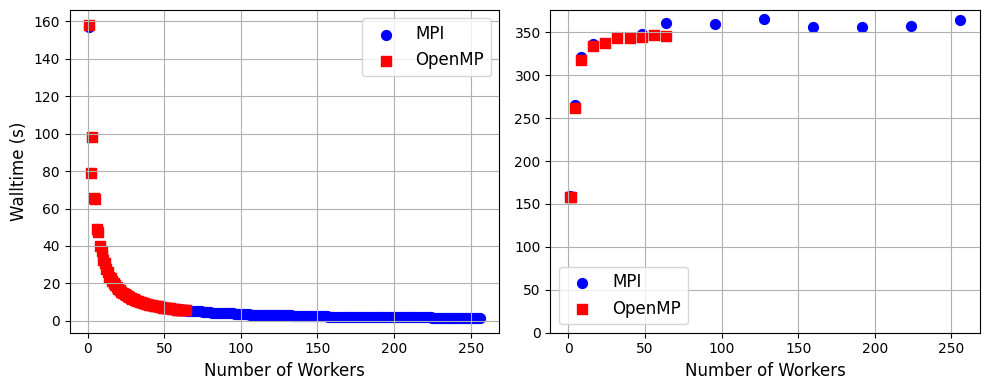

In [3]:
# Fontsize for various components
label_fontsize = 12
ticklabel_fontsize = 12
legend_fontsize = 12
box_annotation_fontsize = 12

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# plot the number of workers vs Walltime for MPI strong scaling
ax[0].scatter(strong_scaling_MPI['Workers'], strong_scaling_MPI['Walltime(s)'], label='MPI', 
              marker='o', color='blue', s=50)
# plot the number of workers vs Walltime for OMP strong scaling
ax[0].scatter(strong_scaling_OMP['Workers'], strong_scaling_OMP['Walltime(s)'], label='OpenMP', 
              marker='s', color='red', s=50)

ax[0].set_xlabel('Number of Workers', fontsize=label_fontsize)
ax[0].set_ylabel('Walltime (s)', fontsize=label_fontsize)
ax[0].grid()
ax[0].legend(fontsize=legend_fontsize)


# plot the number of workers vs walltime for MPI weak scaling
ax[1].scatter(weak_scaling_MPI['Workers'], weak_scaling_MPI['Walltime(s)'], label='MPI', 
              marker='o', color='blue', s=50)
# plot the number of workers vs walltime for OMP weak scaling
ax[1].scatter(weak_scaling_OMP['Workers'], weak_scaling_OMP['Walltime(s)'], label='OpenMP', 
              marker='s', color='red', s=50)

ax[1].set_xlabel('Number of Workers', fontsize=label_fontsize)
# ax[1].set_ylabel('Walltime (s)', fontsize=label_fontsize)
ax[1].set_ylim(bottom=0)
ax[1].grid()
ax[1].legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.savefig('../plots/walltime.png', dpi=600)
plt.show()

In [4]:
# Ratio of the maximum walltime to the minimum walltime for MPI strong scaling
print(strong_scaling_MPI['Walltime(s)'].max()/strong_scaling_MPI['Walltime(s)'].min())

# Ratio of the maximum walltime to the minimum walltime for OMP strong scaling
print(strong_scaling_OMP['Walltime(s)'].max()/strong_scaling_OMP['Walltime(s)'].min())

101.41548404518888
27.97814600758357


In [5]:
# Find the index of the minimum walltime for MPI strong scaling
strong_scaling_MPI['Walltime(s)'].idxmin()

232

In [6]:
# Average of the Walltime for the weak scaling walltime for MPI if the number of workers greater than 48
print(weak_scaling_MPI[weak_scaling_MPI['Workers'] > 48]['Walltime(s)'].mean())

# Average of the Walltime for the weak scaling walltime for OMP if the number of workers greater than 24
print(weak_scaling_OMP[weak_scaling_OMP['Workers'] > 24]['Walltime(s)'].mean())

360.050518
344.601983


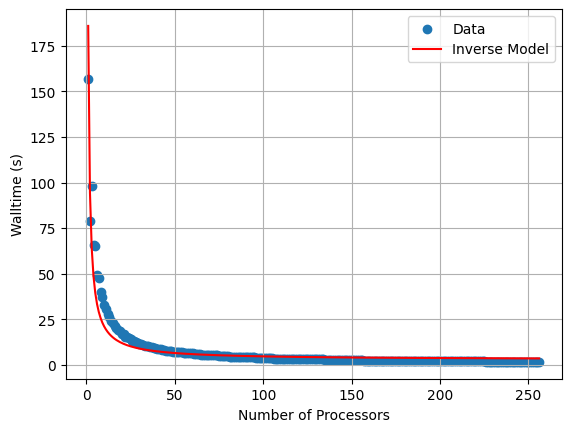

Inverse model
Fitted parameters: serial = 2.76011276133381, parallel = 183.23752706867458
R-squared value: 0.9001170338116589


In [7]:
# Non-linear regression for the walltime vs number of workers for strong scaling for MPI

# Define the model function (linear function in this case)
def inverse_model(x, serial, parallel):
    return serial + parallel/x

# Generate some sample data
x_data = strong_scaling_MPI['Workers']
y_data = strong_scaling_MPI['Walltime(s)']  # /strong_scaling_MPI['Walltime(s)'].max()
# The serial and parallel components of the execution time don't add up to 1
# Even after normalizing the walltime by the serial execution time

# Use curve_fit to fit the data with the inverse model
params_inverse, _ = curve_fit(inverse_model, x_data, y_data)

# Extract the fitted parameters
serial_fit = params_inverse[0]
paralell_fit = params_inverse[1]

# Calculate the fitted values
y_fit_inverse = inverse_model(x_data, serial_fit, paralell_fit)

# Calculate the R-squared value
r_squared_inverse = r2_score(y_data, y_fit_inverse)

# Plot the original data and the fitted line
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit_inverse, color='red', label='Inverse Model')

plt.xlabel('Number of Processors')
plt.ylabel('Walltime (s)')
plt.legend()
plt.grid()
plt.show()

print("Inverse model")
print(f"Fitted parameters: serial = {serial_fit}, parallel = {paralell_fit}")
print(f"R-squared value: {r_squared_inverse}")

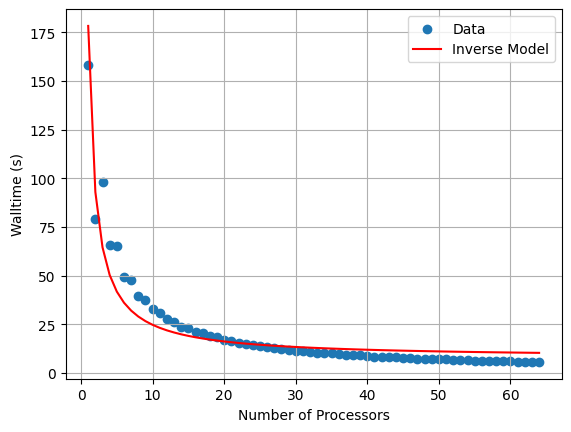

Inverse model
Fitted parameters: serial = 7.642529018893579, parallel = 170.62104863158652
R-squared value: 0.9053815532314478


In [8]:
# Non-linear regression for the walltime vs number of workers for strong scaling for OMP

# Define the model function (linear function in this case)
def inverse_model(x, serial, parallel):
    return serial + parallel/x

# Generate some sample data
x_data = strong_scaling_OMP['Workers']
y_data = strong_scaling_OMP['Walltime(s)']

# Use curve_fit to fit the data with the inverse model
params_inverse, _ = curve_fit(inverse_model, x_data, y_data)

# Extract the fitted parameters
serial_fit = params_inverse[0]
paralell_fit = params_inverse[1]

# Calculate the fitted values
y_fit_inverse = inverse_model(x_data, serial_fit, paralell_fit)

# Calculate the R-squared value
r_squared_inverse = r2_score(y_data, y_fit_inverse)

# Plot the original data and the fitted line
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit_inverse, color='red', label='Inverse Model')

plt.xlabel('Number of Processors')
plt.ylabel('Walltime (s)')
plt.legend()
plt.grid()
plt.show()

print("Inverse model")
print(f"Fitted parameters: serial = {serial_fit}, parallel = {paralell_fit}")
print(f"R-squared value: {r_squared_inverse}")

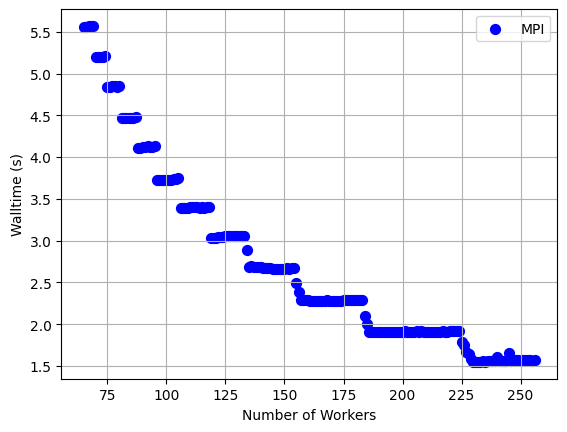

In [9]:
# Plot the walltime of strong scaling for MPI if the number of workers surpasses the number of cores in a single socket
plt.scatter(strong_scaling_MPI[strong_scaling_MPI['Workers'] > 64]['Workers'], 
            strong_scaling_MPI[strong_scaling_MPI['Workers'] > 64]['Walltime(s)'], label='MPI', 
            marker='o', color='blue', s=50)
plt.xlabel('Number of Workers')
plt.ylabel('Walltime (s)')
plt.legend()
plt.grid()
plt.show()

# Strong Scaling combined

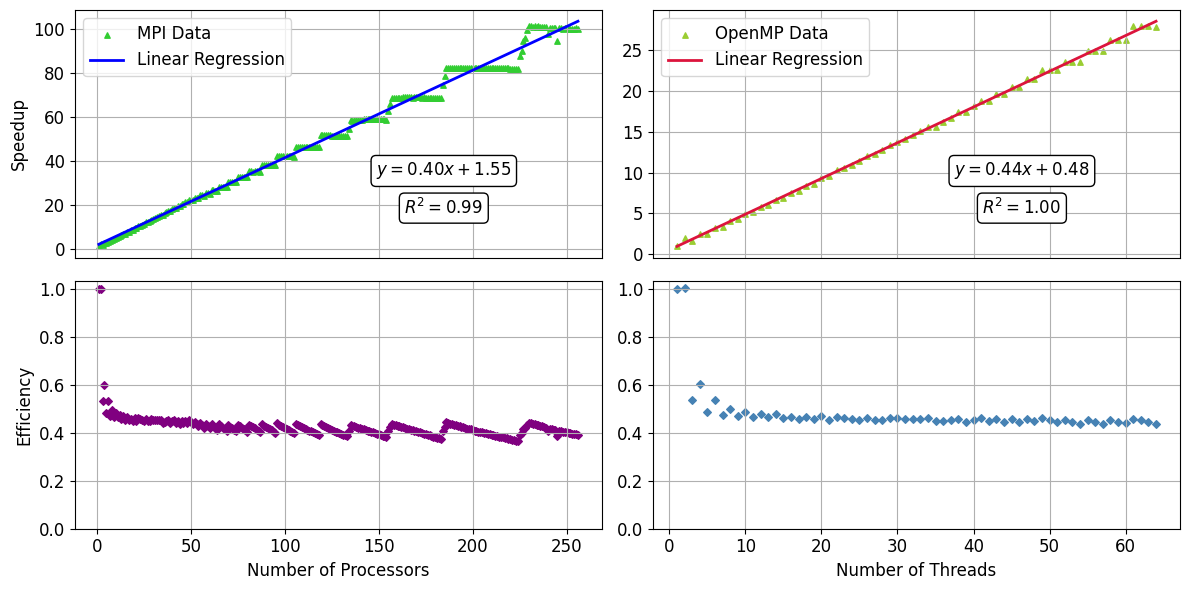

In [10]:
# Fontsize for various components
label_fontsize = 12
ticklabel_fontsize = 12
legend_fontsize = 12
box_annotation_fontsize = 12

# Plot the Speedup vs Workers and the Efficiency vs Workers for MPI
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharey=False)

# First panel: Speedup vs Workers================================
# MPI data-------------------------------------
ax[0,0].scatter(strong_scaling_MPI['Workers'], strong_scaling_MPI['Speedup'], 
              marker='^', color='limegreen', s=15, label='MPI Data')

# Perform a linear regression for the speedup
x_MPI = strong_scaling_MPI['Workers']
y_MPI = strong_scaling_MPI['Speedup']
x_MPI = sm.add_constant(x_MPI)
model_MPI = sm.OLS(y_MPI, x_MPI).fit()

# Extract coefficients
intercept_MPI, slope_MPI = model_MPI.params

# Extract R-squared value
r_squared_MPI = model_MPI.rsquared

# Create the equation string
equation_str_MPI = f'$y = {slope_MPI:.2f}x + {intercept_MPI:.2f}$'


# Display the linear regression equation below the plot label
ax[0,0].annotate(equation_str_MPI, xy=(0.7, 0.35), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                fontsize=box_annotation_fontsize, color='black')

# Display the R-squared value below the plot label
ax[0,0].annotate(f'$R^2 = {r_squared_MPI:.2f}$', xy=(0.7, 0.2), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                fontsize=box_annotation_fontsize, color='black')

# plot the linear regression line
ax[0,0].plot(strong_scaling_MPI['Workers'], slope_MPI*strong_scaling_MPI['Workers'] + intercept_MPI, 
          color='blue', linestyle='-', linewidth=2, label='Linear Regression')

# OpenMP data-------------------------------------
ax[0,1].scatter(strong_scaling_OMP['Workers'], strong_scaling_OMP['Speedup'], 
              marker='^', color='yellowgreen', s=15, label='OpenMP Data')

# Perform a linear regression for the speedup
x_OMP = strong_scaling_OMP['Workers']
y_OMP = strong_scaling_OMP['Speedup']
x_OMP = sm.add_constant(x_OMP)
model_OMP = sm.OLS(y_OMP, x_OMP).fit()

# Extract coefficients
intercept_OMP, slope_OMP = model_OMP.params

# Extract R-squared value
r_squared_OMP = model_OMP.rsquared

# Create the equation string
equation_str_OMP = f'$y = {slope_OMP:.2f}x + {intercept_OMP:.2f}$'

# Display the linear regression equation below the plot label
ax[0,1].annotate(equation_str_OMP, xy=(0.7, 0.35), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                fontsize=box_annotation_fontsize, color='black')

# Display the R-squared value below the plot label
ax[0,1].annotate(f'$R^2 = {r_squared_OMP:.2f}$', xy=(0.7, 0.2), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                fontsize=box_annotation_fontsize, color='black')

# plot the linear regression line
ax[0,1].plot(strong_scaling_OMP['Workers'], slope_OMP*strong_scaling_OMP['Workers'] + intercept_OMP, 
          color='crimson', linestyle='-', linewidth=2, label='Linear Regression')

ax[0,0].set_ylabel('Speedup', fontsize=label_fontsize)
ax[0,0].grid()
ax[0,1].grid()
ax[0,0].legend(fontsize=legend_fontsize)
ax[0,1].legend(fontsize=legend_fontsize)

# Remove x-axis labels and ticks for the first row
for axs in ax[0]:
    axs.set_xticklabels([])
    axs.tick_params(axis='x', which='both', bottom=False, top=False)

# Second panel: Efficiency vs Workers================================

# MPI data-------------------------------------

ax[1,0].scatter(strong_scaling_MPI['Workers'], strong_scaling_MPI['Efficiency'],
              marker='D', color='purple', label='MPI Data', s = 15)

# OpenMP data-------------------------------------
ax[1,1].scatter(strong_scaling_OMP['Workers'], strong_scaling_OMP['Efficiency'],
              marker='D', color='steelblue', label='OpenMP Data', s = 15)

ax[1,0].set_xlabel('Number of Processors', fontsize=label_fontsize)
ax[1,1].set_xlabel('Number of Threads', fontsize=label_fontsize)
ax[1,0].set_ylabel('Efficiency', fontsize=label_fontsize)
ax[1,0].grid()
ax[1,1].grid()
ax[1,0].set_ylim(bottom=0)
ax[1,1].set_ylim(bottom=0)

# Adjust fontsize for tick labels
for axis in ax.flat:
    for tick in axis.get_xticklabels() + axis.get_yticklabels():
        tick.set_fontsize(ticklabel_fontsize)


plt.tight_layout()
plt.savefig('../plots/strong_scaling.png', dpi=600)

plt.show()


In [11]:
# Compute the average of the efficiency for MPI and OMP strong scaling for more than 20 workers
print(strong_scaling_MPI[strong_scaling_MPI['Workers'] > 10]['Efficiency'].mean())
print(strong_scaling_OMP[strong_scaling_OMP['Workers'] > 10]['Efficiency'].mean())

0.41796494582292026
0.4547115006819326


## Non-linear fit for the speedup 

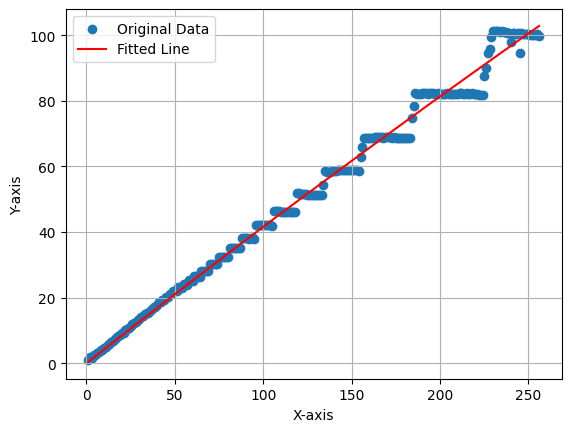

Fitted parameters: serial = 0.0005514648086605522, parallel = 2.3485841763059
R-squared value: 0.9912048974699853


In [12]:
# Define the model function (linear function in this case)
def model(P, serial, parallel):
    return 1./(serial + parallel/P)

# Generate some sample data
x_data = strong_scaling_MPI['Workers']
y_data = strong_scaling_MPI['Speedup']

# Use curve_fit to fit the data with the linear model
params, covariance = curve_fit(model, x_data, y_data)

# Extract the fitted parameters
serial_fit, parallel_fit = params

# Calculate the fitted values
y_fit = model(x_data, serial_fit, parallel_fit)

# Calculate the R-squared value
r_squared = r2_score(y_data, y_fit)

# Plot the original data and the fitted line
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fit, color='red', label='Fitted Line')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

print(f"Fitted parameters: serial = {serial_fit}, parallel = {parallel_fit}")
print(f"R-squared value: {r_squared}")


# Weak Scaling combined

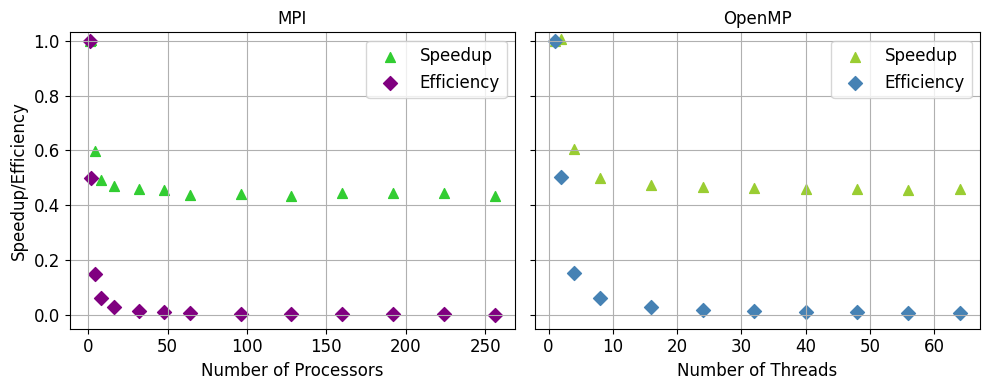

In [13]:
# Plot the Speedup vs Workers and the Efficiency vs Workers for MPI and OpenMP
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Speedup vs Workers================================
# MPI data-------------------------------------
ax[0].scatter(weak_scaling_MPI['Workers'], weak_scaling_MPI['Speedup'], 
              marker='^', color='limegreen', s=50, label='Speedup')
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('Number of Processors', fontsize=label_fontsize)
ax[0].set_ylabel('Speedup', fontsize=label_fontsize)


# OpenMP data-------------------------------------
ax[1].scatter(weak_scaling_OMP['Workers'], weak_scaling_OMP['Speedup'], 
              marker='^', color='yellowgreen', s=50, label='Speedup')
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel('Number of Threads', fontsize=label_fontsize)

# Efficiency vs Workers================================

# MPI data-------------------------------------
ax[0].scatter(weak_scaling_MPI['Workers'], weak_scaling_MPI['Efficiency'],
            marker='D', color='purple', label='Efficiency', s=50)

# OpenMP data-------------------------------------
ax[1].scatter(weak_scaling_OMP['Workers'], weak_scaling_OMP['Efficiency'],
            marker='D', color='steelblue', label='Efficiency', s=50)

ax[0].set_ylabel('Speedup/Efficiency', fontsize=label_fontsize)
ax[0].grid()
ax[1].grid()
ax[0].legend(loc='upper right', fontsize=legend_fontsize)
ax[1].legend(loc='upper right', fontsize=legend_fontsize)

# Remove ticks from the second plot
# ax[1].set_yticks([])

# Set titles for the plots
ax[0].set_title('MPI', fontsize=label_fontsize)
ax[1].set_title('OpenMP', fontsize=label_fontsize)

# Adjust the y-axis limits
ax[0].set_ylim(bottom=-0.05)
ax[1].set_ylim(bottom=-0.05)

# Adjust fontsize for tick labels
for axis in ax:
    for tick in axis.get_xticklabels() + axis.get_yticklabels():
        tick.set_fontsize(ticklabel_fontsize)

plt.tight_layout()
plt.savefig('../plots/weak_scaling.png', dpi=600)
plt.show()


In [14]:
# Minimum efficiency for MPI and OMP weak scaling
print(weak_scaling_MPI['Efficiency'].min())
print(weak_scaling_OMP['Efficiency'].min())

# Worker number for the minimum efficiency for MPI and OMP weak scaling
print(weak_scaling_MPI['Workers'][weak_scaling_MPI['Efficiency'].idxmin()])
print(weak_scaling_OMP['Workers'][weak_scaling_OMP['Efficiency'].idxmin()])

0.001700396663596713
0.007154142104499712
256
64


In [15]:
# Efficiency if the number of workers if less than 50 for MPI and 30 for OMP
print(weak_scaling_MPI[weak_scaling_MPI['Workers'] < 50]['Efficiency'])
print(weak_scaling_OMP[weak_scaling_OMP['Workers'] < 50]['Efficiency'])

# 7th element of the number of workers for MPI weak scaling
print(weak_scaling_MPI['Workers'][7])

# 9th element of the number of workers for OMP weak scaling
print(weak_scaling_OMP['Workers'][9])

0    1.000000
1    0.501210
2    0.149853
3    0.061736
4    0.029493
5    0.014385
6    0.009507
Name: Efficiency, dtype: float64
0    1.000000
1    0.502662
2    0.151390
3    0.062425
4    0.029666
5    0.019521
6    0.014437
7    0.011530
8    0.009572
Name: Efficiency, dtype: float64
64
56
